In [11]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("DATASET_BERES_WindowzScore.csv",parse_dates=True)
df = pd.DataFrame(df)
#df["start"] = df["start"].astype("datetime64")

vect = df[['MeanInt', 'SpatialLoc']].to_numpy()
df['vect'] = vect.tolist()
df = df[['start','vect']]


#print(df_stand)

print(df.info())
#df.to_csv('DATASET_BERESWindowzScore_Vect.csv', index=False,      encoding='utf-8')
#print(df2)
#print(df2[15])

#print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137985 entries, 0 to 137984
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   start   137985 non-null  object
 1   vect    137985 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None


                     intercontact
start                            
2004-07-19 12:00:00      0.000000
2004-07-19 12:00:00      0.000556
2004-07-20 06:00:00      1.662222
2004-07-20 06:00:00      1.895278
2004-07-20 06:00:00      0.230455
...                           ...
2005-06-20 06:00:00      0.000000
2005-06-20 12:00:00      0.000000
2005-06-20 18:00:00      0.000000
2005-06-21 12:00:00      0.975278
2005-06-22 12:00:00      0.000000

[137985 rows x 1 columns]


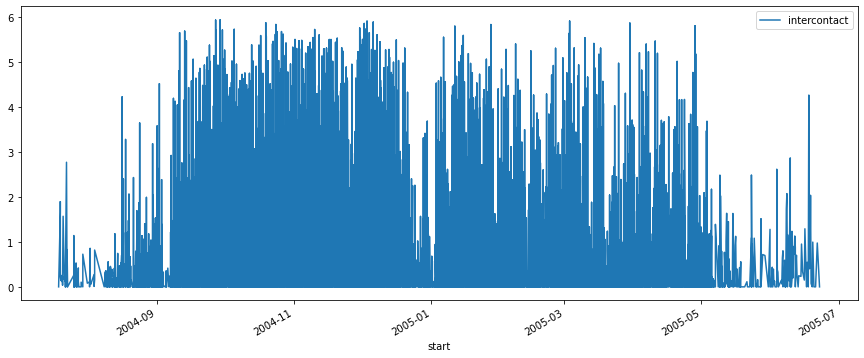

In [1]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv("MeanIntercontact_Window.csv", index_col='start', parse_dates=True)
drop_col = ['id_colums']
df.drop(drop_col, axis=1, inplace=True)
print(df)
df.plot(figsize=(15, 6))
plt.show()


        intercontact
0          -0.613667
1          -0.612730
2           2.189233
3           2.582220
4          -0.225066
...              ...
137980     -0.613667
137981     -0.613667
137982     -0.613667
137983      1.030882
137984     -0.613667

[137985 rows x 1 columns]
        intercontact
0           0.000000
1           0.000094
2           0.279757
3           0.318981
4           0.038786
...              ...
137980      0.000000
137981      0.000000
137982      0.000000
137983      0.164142
137984      0.000000

[137985 rows x 1 columns]


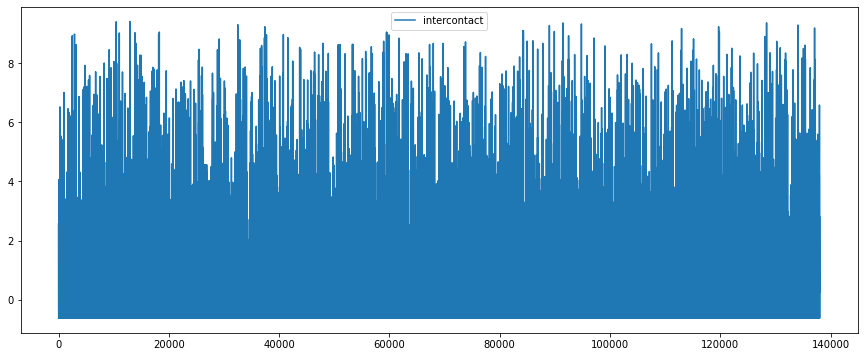

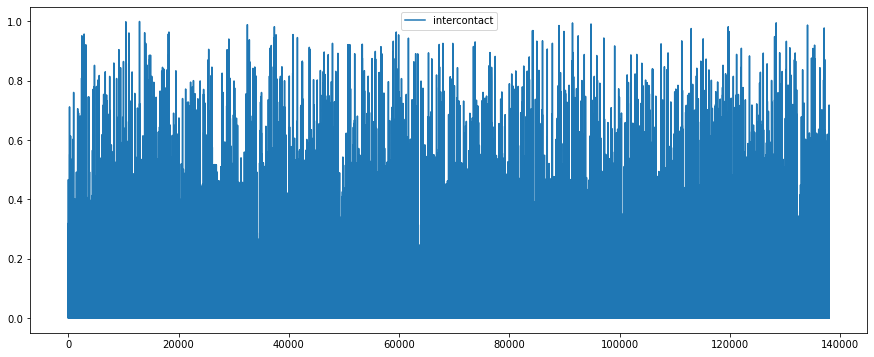

In [5]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("MeanIntercontact_Window.csv", usecols=['intercontact'], parse_dates=True)
df = pd.DataFrame(df)

df_stand = (df-df.mean())/df.std()
df_stand1 = (df-df.min())/df.max()-df.min()
print(df_stand)
print(df_stand1)
df_stand.plot(figsize=(15, 6))
df_stand1.plot(figsize=(15, 6))
plt.show()
df_stand1.to_csv('MeanInt_Window_Normalize.csv', index=False,      encoding='utf-8')

In [26]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("DATASET_BERES_WindowzScore.csv", parse_dates=True)
df = pd.DataFrame(df)
#dfId = df[df['id_colums']=='4,7'].copy()
df_train = df[df['start']<'2005-03-19 12:00:00']
df_test = df[df['start']>='2005-03-19 12:00:00']
vect = df[['MeanInt', 'SpatialLoc']].to_numpy()
vect_train = df_train[['MeanInt', 'SpatialLoc']].to_numpy()
vect_train = vect_train.tolist()
vect_test = df_test[['MeanInt', 'SpatialLoc']].to_numpy()
vect_test = vect_test.tolist()


#print("Training set has {} observations.".format(len(vect_train)))
#print("Test set has {} observations.".format(len(vect_test)))



#train_data, test_data = train_test_split(X_scaled, test_size=0.2, shuffle=False)

#print(vect_test)
#print(df['SpatialLoc'].isnull().sum())

Training set has 132273 observations.
Test set has 5712 observations.


In [30]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
SEQUENCE_SIZE = 50
x_train,y_train = to_sequences(SEQUENCE_SIZE,vect_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,vect_test)
print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (132223, 50, 1, 2)
Shape of test set: (5662, 50, 1, 2)


In [43]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()
model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0,\
                   input_shape=( 50, 2)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
print('Train...')

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Build model...


NotImplementedError: Cannot convert a symbolic Tensor (lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

In [37]:
import numpy as np

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

NameError: name 'spots_train' is not defined

In [17]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("DATASET_BERES_update.csv",  parse_dates=True)
df = pd.DataFrame(df)
df.id_colums = df.id_colums.str.split(',')
split_df = pd.DataFrame(df['id_colums'].tolist(),  columns=['id1', 'id2'])
split_df = split_df[['id1','id2']].astype(str).astype(int)
df = pd.concat([df, split_df], axis=1)


df = df.loc[df["id1"] <= 11]
df = df.loc[df['id2'] <= 11]


df[['id1','id2']]= df[['id1','id2']].astype(str)

df['id_pair'] = df[['id1','id2']].apply(lambda x: ','.join(x), axis=1)
#val = df['id_pair'].to_numpy()
#print(df['id1'].unique())
#print(df['id2'].unique())
df = df.loc['2004-07-20 12:00:00':'2004-12-19 12:00:00']
df = df[['start','id_pair','intercontact','SpatialLoc']]
print(df.info())
print(df)
#newdf =  df[['start','id_colums','intercontact','SpatialLoc']]
#newdf_pivot = pd.pivot_table(newdf, index=['start','id_colums'])
#print(newdf_pivot)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   start         0 non-null      object 
 1   id_pair       0 non-null      object 
 2   intercontact  0 non-null      float64
 3   SpatialLoc    0 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [start, id_pair, intercontact, SpatialLoc]
Index: []


In [25]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("FIX-DATASET.csv",index_col='start', parse_dates=True)
df1 = pd.read_csv("dataset1bln.csv",index_col='start', parse_dates=True)
df = pd.DataFrame(df)
df1 = pd.DataFrame(df1)
#df = df.loc[:'2004-08-25 12:00:00']
df3 = pd.merge(df, df1, how="left", on=["start","id_colums"])
print(df.info())
print(df)
print(df1)
print(df3)
#df3.to_csv('FIX-DATASET-cek.csv',     encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11629 entries, 2004-07-19 12:00:00 to 2004-08-25 12:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_colums  11627 non-null  object
dtypes: object(1)
memory usage: 181.7+ KB
None
                    id_colums
start                        
2004-07-19 12:00:00       0,1
2004-07-19 12:00:00       0,2
2004-07-19 12:00:00       0,3
2004-07-19 12:00:00       0,4
2004-07-19 12:00:00       0,5
...                       ...
2004-08-25 12:00:00     18,87
2004-08-25 12:00:00     18,89
2004-08-25 12:00:00     59,87
2004-08-25 12:00:00     59,89
2004-08-25 12:00:00     87,89

[11629 rows x 1 columns]
                    id_colums  intercontact  SpatialLoc
start                                                  
2004-07-19 12:00:00       1,3      0.000000           2
2004-07-19 12:00:00       4,7      0.000556           2
2004-07-20 06:00:00       4,5      1.662222          

In [17]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("DATASET_BERES_update.csv", parse_dates=True)
df = pd.DataFrame(df)
val = df['id_colums'].to_numpy()
uniqVal = np.unique(val).tolist()
#d = {'id_pair': [uniqVal]}
newdf = pd.DataFrame(uniqVal, columns = ['id_pair'])


#newdf = newdf.sort_values(by='id_pair', ascending=True)
#print(newdf.loc[newdf['id_pair'] == '3,6'])
print(newdf.info())
#newdf.to_csv('idpair.csv', index=False,      encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_pair  2132 non-null   object
dtypes: object(1)
memory usage: 16.8+ KB
None


In [11]:
from tensorflow import keras 2132
print(keras.__version__)
['0,1' '0,10' '0,11' '0,2' '0,4' '0,5' '0,6' '0,7' '0,8' '1,10' '1,11'
 '1,2' '1,3' '1,4' '1,5' '1,6' '1,7' '1,8' '10,11' '2,10' '2,11' '2,4'
 '2,5' '2,6' '2,7' '2,8' '3,6' '3,8' '4,10' '4,11' '4,5' '4,6' '4,7' '4,8'
 '5,10' '5,11' '5,6' '5,7' '5,8' '6,10' '6,11' '6,7' '6,8' '7,10' '7,11'

2.4.0


In [39]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("idpair.csv")
df = pd.DataFrame(df)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_pair  2132 non-null   object
dtypes: object(1)
memory usage: 16.8+ KB
None
  id_pair
0     0,1
1     0,2
2     0,4
3     0,5
4     0,6


In [ ]:
['0,1' 
 '0,10'
 '0,11'
 '0,2'
 '0,4'
 '0,5'
 '0,6'
 '0,7'
 '0,8'
 '1,10'
 '1,11'
 '1,2'
 '1,3'
 '1,4'
 '1,5'
 '1,6'
 '1,7'
 '1,8'
 '2,10'
 '2,11'
 '2,4'
 '2,5'
 '2,6'
 '2,7'
 '2,8'
 '3,6'
 '3,8'
 '4,10'
 '4,11'
 '4,5'
 '4,6'
 '4,7'
 '4,8'
 '5,10'
 '5,11'
 '5,6'
 '5,7'
 '5,8'
 '6,10'
 '6,11'
 '6,7'
 '6,8'
 '7,10'
 '7,11'
 '7,8'
 '8,10'
 '8,11'
 '10,11'
]